# TensorFlow Dataset 测试

## 程式参考来源：
- https://www.tensorflow.org/guide/data
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset
- https://www.tensorflow.org/guide/data_performance
- https://www.tensorflow.org/tutorials/keras/text_classification

## 范例1. 自 list 转入 Dataset

In [1]:
import tensorflow as tf

# 自 list 转入
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

## 取出所有资料

In [2]:
# 使用 for 回圈可自 Dataset 取出所有资料
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


## 取出所有资料

In [3]:
# 转成 iterator
it = iter(dataset)

# 一次取一笔
print(next(it).numpy())
print(next(it).numpy())

8
3


## 范例2. 依照维度小计(reduce)

In [4]:
# 依照维度小计(reduce)
import numpy as np

# 一维资料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

initial_state=0    # 起始值
print(ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

15


In [5]:
# 依照第一维度小计(reduce)
import numpy as np

# 二维资料
ds = tf.data.Dataset.from_tensor_slices(np.arange(1,11).reshape(2,5)) 

initial_state=0    # 起始值
print(ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

[ 7  9 11 13 15]


In [6]:
# 依照第一维度小计(reduce)
import numpy as np

# 三维资料
ds = tf.data.Dataset.from_tensor_slices(np.arange(1,13).reshape(2,2,3)) 

print('原始资料:\n', np.arange(1,13).reshape(2,2,3), '\n')

initial_state=0    # 起始值
print('计算结果:\n', ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

原始资料:
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]] 

计算结果:
 [[ 8 10 12]
 [14 16 18]]


## 范例3. 对每个元素应用函数(map)

In [7]:
# 对每个元素应用函数(map)
import numpy as np

# 测试资料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 对每个元素应用函数(map)
ds = ds.map(lambda x: x * 2)

# 转成 iterator，再显示
print(list(ds.as_numpy_iterator())) 

[2, 4, 6, 8, 10]


## 范例4. 过滤(filter)

In [8]:
# 过滤(filter)
import numpy as np

# 测试资料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 对每个元素应用函数(map)
ds = ds.filter(lambda x: x % 2 == 0)

# 转成 iterator，再显示
print(list(ds.as_numpy_iterator())) 

[2, 4]


## 范例 5. 资料复制(repeat)

In [9]:
# 资料复制(repeat)
import numpy as np

# 测试资料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 重复 3 次
ds = ds.repeat(3)

# 转成 iterator，再显示
print(list(ds.as_numpy_iterator())) 

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


## 范例6. Dataset分片(Shard)：将资料依固定间隔取样

In [10]:
# 分片(Shard)
import numpy as np

# 测试资料：0~10
ds = tf.data.Dataset.range(11)
print('原始资料:\n', list(ds.as_numpy_iterator())) 

# 每 3 笔间隔取样一笔，从第一笔开始
ds = ds.shard(num_shards=3, index=0)

# 转成 iterator，再显示
print('\n计算结果:\n', list(ds.as_numpy_iterator())) 

原始资料:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

计算结果:
 [0, 3, 6, 9]


## 范例7. 将MNIST资料转入Dataset

In [11]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 载入 MNIST 手写阿拉伯数字资料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 转为 Dataset，含 X/Y 资料
dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
print(dataset)

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>


## 逐批取资料

In [12]:
# 每次随机抽出 1000 笔
# shuffle：每次从 60000 笔训练资料取出 10000 笔洗牌，batch：随机抽出 1000 笔
train_dataset = dataset.shuffle(10000).batch(1000)
i=0
for (x_train, y_train) in train_dataset:
    if i == 0:
        print(x_train.shape)
        print(x_train[0])
        
    i+=1
print(i)

(1000, 28, 28)
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

60


## 范例8. 自随机乱数产生 Dataset

In [13]:
import tensorflow as tf

# 随机乱数产生 Dataset
ds = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

# 转成 iterator，再显示
print(list(ds.as_numpy_iterator())) 

[array([2, 5, 5, 5, 7, 9, 4, 8, 5, 7]), array([4, 6, 5, 8, 8, 8, 1, 5, 3, 1]), array([9, 7, 1, 9, 1, 7, 8, 1, 2, 6]), array([6, 6, 8, 2, 4, 9, 2, 8, 5, 8])]


## 范例9. 自Tensorflow Tensor资料型态的变数转入 Dataset

In [14]:
import tensorflow as tf

# 稀疏矩阵
mat = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], 
                      dense_shape=[3, 4])

# 转入 Dataset
ds = tf.data.Dataset.from_tensors(mat)

# 使用回圈自 Dataset 取出所有资料
for elem in ds:
    print(tf.sparse.to_dense(elem).numpy()) 

[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]]


## 范例10. 自Python Generator资料型态的变数转入Dataset
#### 程式修改自 https://yann-leguilly.gitlab.io/post/2019-10-09-tensorflow-tfdata/

In [15]:
# 从网路取得压缩档，并解压缩
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# 定义参数
BATCH_SIZE = 32 # 批量
IMG_DIM = 224   # 影像宽度
NB_CLASSES = 5  # label 类别数

# 资料增补，rescale：特征缩放， rotation_range：自动增补旋转20度内的图片
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

228818944/228813984 [==============================] - 118s 1us/step


Found 3670 images belonging to 5 classes.
labels: [0. 1. 0. 0. 0.]


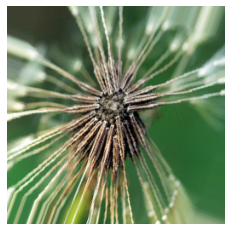

In [16]:
# 取一批档案
images, labels = next(img_gen.flow_from_directory(flowers))

# 显示第一笔影像
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.axis('off')
print('labels:', labels[0])

In [17]:
# 定义 generator 的属性：取出资料的逻辑
gen = img_gen.flow_from_directory(
    flowers,
    (IMG_DIM, IMG_DIM),
    'rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 转入 Dataset
ds = tf.data.Dataset.from_generator(lambda: gen,
    output_signature=(
         tf.TensorSpec(shape=(BATCH_SIZE, IMG_DIM, IMG_DIM, 3)),
         tf.TensorSpec(shape=(BATCH_SIZE, NB_CLASSES))
                     )
    )

Found 3670 images belonging to 5 classes.


In [18]:
# 取下一批资料
it = iter(ds)
images, label = next(it)
print(np.array(images).shape, np.array(label).shape)

(32, 224, 224, 3) (32, 5)
